In [117]:
%matplotlib
import matplotlib.pyplot as plt
import pandas as pd

Using matplotlib backend: <object object at 0x0000027B7E75A8B0>


# Load and process data

In [118]:
# Fix Danish headers first
df = pd.read_csv("data/el-forbrugsrapport.csv", sep=";", skiprows=1, encoding="ISO-8859-1")
df.tail()

,Dato,Værdi(KWh)
7841,21-01-2023 19:00:00,"2,010000"
7842,21-01-2023 20:00:00,"1,680000"
7843,21-01-2023 21:00:00,"2,420000"
7844,21-01-2023 22:00:00,"2,080000"
7845,21-01-2023 23:00:00,"2,680000"


In [119]:
# Prepare data: Fix danish chars, weird decimal chars etc.
df.rename(columns={"Værdi(KWh)": "kWh"}, inplace=True)
df["Datetime"] = pd.to_datetime(df["Dato"], infer_datetime_format=False, format='%d-%m-%Y %H:%M:%S')
df["Date"] = df["Datetime"].dt.date
df["WeekendFlag"] = df["Datetime"].dt.dayofweek > 4
df["kWh"] = df["kWh"].str.replace(",", ".")
df["kWh"] = pd.to_numeric(df["kWh"])
df.sort_values(by=['Datetime'])

# Set index
df.set_index("Datetime", inplace=True)
df.drop(columns=["Dato"], inplace=True)
df.tail()

,kWh,Date,WeekendFlag
Datetime,,,
2023-01-21 19:00:00,2.01,2023-01-21,True
2023-01-21 20:00:00,1.68,2023-01-21,True
2023-01-21 21:00:00,2.42,2023-01-21,True
2023-01-21 22:00:00,2.08,2023-01-21,True
2023-01-21 23:00:00,2.68,2023-01-21,True


# Investigate the data

In [120]:
df.describe()

,kWh
count,7846.000000
mean,1.691515
std,1.659773
min,0.150000
25%,0.650000
50%,1.370000
75%,2.240000
max,25.280000


In [121]:
df.kWh.sum()

13271.63

In [122]:
df.loc[df['kWh'].idxmax(), :]

kWh                 25.28
Date           2022-12-20
WeekendFlag         False
Name: 2022-12-20 03:00:00, dtype: object

In [123]:
df[df.Date == pd.to_datetime('2022-12-20')]

C:\Users\tjans\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,kWh,Date,WeekendFlag
Datetime,,,
2022-12-20 00:00:00,5.02,2022-12-20,False
2022-12-20 01:00:00,3.84,2022-12-20,False
2022-12-20 02:00:00,3.82,2022-12-20,False
2022-12-20 03:00:00,25.28,2022-12-20,False
2022-12-20 04:00:00,11.48,2022-12-20,False
2022-12-20 05:00:00,3.94,2022-12-20,False
2022-12-20 06:00:00,4.96,2022-12-20,False
2022-12-20 07:00:00,3.78,2022-12-20,False
2022-12-20 08:00:00,3.22,2022-12-20,False


In [124]:
df.describe()

,kWh
count,7846.000000
mean,1.691515
std,1.659773
min,0.150000
25%,0.650000
50%,1.370000
75%,2.240000
max,25.280000


In [125]:
df.loc[df['kWh'].idxmax(), :]

kWh                 25.28
Date           2022-12-20
WeekendFlag         False
Name: 2022-12-20 03:00:00, dtype: object

# Initial plot

In [1]:
ax = df.plot(
    y='kWh',
    figsize=(27,9), 
    grid=True
    )
    

NameError: name 'df' is not defined

In [ ]:
df_plot_zoom = df[df.]
ax = df.plot(
    y='kWh',
    figsize=(27,9), 
    grid=True
    )

                      kWh        Date  WeekendFlag
Datetime                                          
2022-03-01 00:00:00  4.35  2022-03-01        False
2022-03-01 01:00:00  4.78  2022-03-01        False
2022-03-01 02:00:00  4.01  2022-03-01        False
2022-03-01 03:00:00  3.71  2022-03-01        False
2022-03-01 04:00:00  5.02  2022-03-01        False
...                   ...         ...          ...
2023-01-21 19:00:00  2.01  2023-01-21         True
2023-01-21 20:00:00  1.68  2023-01-21         True
2023-01-21 21:00:00  2.42  2023-01-21         True
2023-01-21 22:00:00  2.08  2023-01-21         True
2023-01-21 23:00:00  2.68  2023-01-21         True

[7846 rows x 3 columns]
               kWh
count  7846.000000
mean      1.691515
std       1.659773
min       0.150000
25%       0.650000
50%       1.370000
75%       2.240000
max      25.280000
               kWh
count  2231.000000
mean      1.737508
std       1.764634
min       0.210000
25%       0.680000
50%       1.340000
75%     

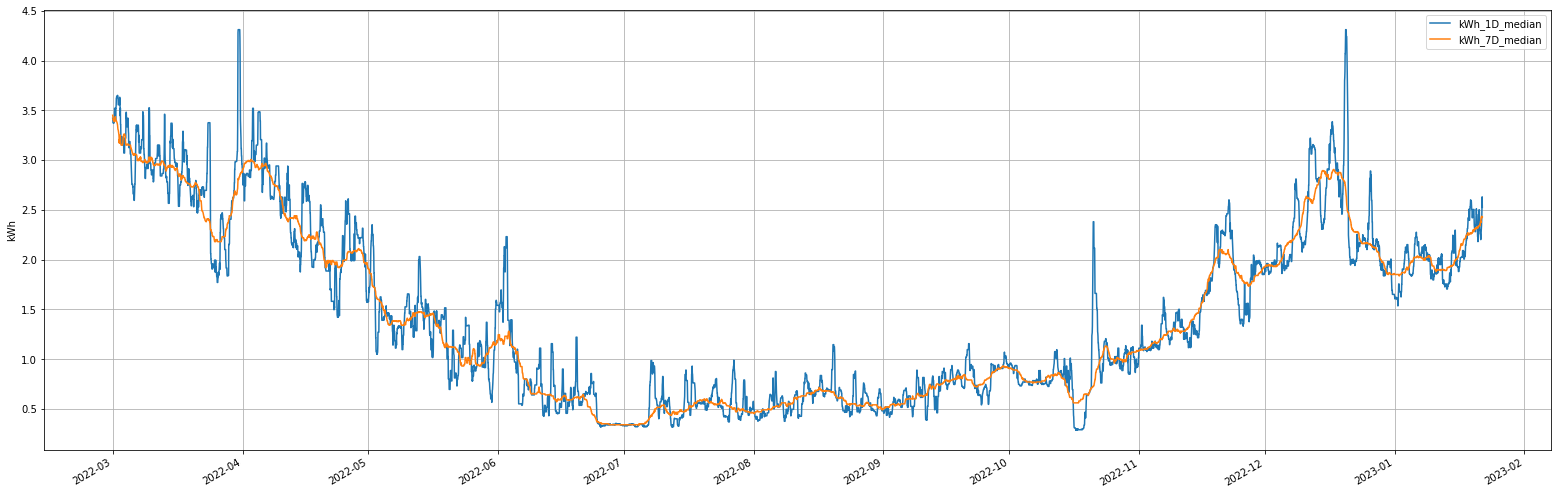

In [116]:
# Plot averages
averages = [
    "1D", 
    "7D", 
    #"28D"
]

fig, ax = plt.subplots()
for avg in averages:
    _df_plot = df
    # _df_plot = df.query('WeekendFlag == False').copy()
    _df_plot = (
        _df_plot[["kWh"]].rolling(avg, min_periods=7, center=True).median().rename(columns={"kWh": f"kWh_{avg}_median"})
    )
    _df_plot.plot(ax=ax, figsize=(27,9), grid=True)
ax.set_xlabel("")
ax.set_ylabel("kWh")

# Calculate rolling means
print(df)
print(df.describe())
print(df.query("WeekendFlag == True").describe())
print(df.query("WeekendFlag == False").describe())

plt.show()
